In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import (
    train_test_split,
    KFold,
    RepeatedKFold,
    cross_val_score,
    GridSearchCV,
)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, RocCurveDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from utils import load_all_images

PIXELS = 50

In [7]:
# settings
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (7, 5)

In [8]:
X, y = load_all_images(classes=['sunny', 'cloudy'], pixels=PIXELS)
len(X)

12976

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, shuffle=True, random_state=123
)

# Binary Classification

## LogisticRegression

### Basic

In [20]:
# create Logisitc Model
log_model = LogisticRegression(
    max_iter=3000,
    verbose=True,
)

result = log_model.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.29586D+03    |proj g|=  4.91114D+02

At iterate   50    f=  5.01651D+03    |proj g|=  3.22159D+01

At iterate  100    f=  4.81408D+03    |proj g|=  2.97305D+01

At iterate  150    f=  4.68747D+03    |proj g|=  2.19654D+01

At iterate  200    f=  4.61583D+03    |proj g|=  1.38268D+01

At iterate  250    f=  4.57118D+03    |proj g|=  1.44663D+01

At iterate  300    f=  4.54165D+03    |proj g|=  1.34950D+01

At iterate  350    f=  4.52254D+03    |proj g|=  1.45914D+01

At iterate  400    f=  4.51412D+03    |proj g|=  2.84638D+00

At iterate  450    f=  4.50791D+03    |proj g|=  3.33854D+00

At iterate  500    f=  4.50468D+03    |proj g|=  1.09227D+01

At iterate  550    f=  4.50287D+03    |proj g|=  2.49857D+00

At iterate  600    f=  4.50197D+03    |proj g|=  1.35207D+00

At iterate  650    f=  4.5

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s finished


Model accuracy: 0.633
Model accuracy: 0.787


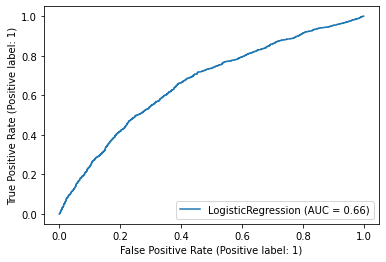

In [24]:
#| echo: false
print(f'Model accuracy: {result.score(X_test, y_test):.3}')
print(f'Model accuracy: {result.score(X_train, y_train):.3}')

RocCurveDisplay.from_estimator(result, X_test, y_test)
plt.show()

### Tuning

In [28]:
# create Logisitc Model
log_cv = LogisticRegressionCV(
    cv=5,
    # solver="liblinear",
    scoring="accuracy",
    n_jobs=-1,
    verbose=True,
    max_iter=2000,
)

# train
results = log_cv.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03710D+03    |proj g|=  3.92545D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03641D+03    |proj g|=  3.92073D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03710D+03    |proj g|=  3.96522D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03641D+03    |proj g|=  3.97796D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501     20     24      1     0     0   8.999D-03   4.672D+03
  F =   4671.7149307315440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57513D+03    |proj g|=  1.04932D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  4.47993D+03    |proj g|=  8.10816D-01

At iterate   50    f=  4.48525D+03    |proj g|=  2.87678D+00

At iterate   50    f=  4.49670D+03    |proj g|=  3.88517D-01

At iterate   50    f=  4.48418D+03    |proj g|=  1.36750D+00

At iterate   50    f=  4.46618D+03    |proj g|=  8.16710D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501     59     69      1     0     0   1.787D-02   4.497D+03
  F =   4496.6953377376103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39981D+03    |proj g|=  3.86132D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501     70     80      1     0     0   5.704D-02   4.480D+03
  F =   4479.9116387449367     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.4

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501     74     86      1     0     0   5.973D-02   4.484D+03
  F =   4484.1257208519355     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42022D+03    |proj g|=  3.64055D+01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501     82     94      1     0     0   2.802D-02   4.485D+03
  F =   4485.0234582378980     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41901D+03    |proj g|=  3.83704D+01


 This problem is unconstrained.



At iterate   50    f=  4.34603D+03    |proj g|=  8.22583D+00

At iterate   50    f=  4.32580D+03    |proj g|=  3.90166D+00

At iterate   50    f=  4.31373D+03    |proj g|=  6.51758D+00

At iterate   50    f=  4.33740D+03    |proj g|=  2.05328D+00

At iterate   50    f=  4.33259D+03    |proj g|=  9.81184D+00

At iterate  100    f=  4.34573D+03    |proj g|=  1.72199D+00

At iterate  100    f=  4.31341D+03    |proj g|=  1.18260D+00

At iterate  100    f=  4.32538D+03    |proj g|=  1.10410D+00

At iterate  100    f=  4.33702D+03    |proj g|=  8.36469D-01

At iterate  100    f=  4.33221D+03    |proj g|=  2.48874D+00

At iterate  150    f=  4.34566D+03    |proj g|=  2.07940D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501    161    179      1     0     0   7.732D-02   4.346D+03
  F =   4345.6614097190586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.27384D+03    |proj g|=  1.37772D+01

At iterate  150    f=  4.31335D+03    |proj g|=  1.11505D-01

At iterate  150    f=  4.32536D+03    |proj g|=  5.29632D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25829D+03    |proj g|=  1.24828D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501    159    186      1     0     0   6.552D-02   4.325D+03
  F =   4325.3570829098244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.2

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.24083D+03    |proj g|=  1.26440D+01

At iterate   50    f=  4.10855D+03    |proj g|=  5.15206D+00

At iterate   50    f=  4.12001D+03    |proj g|=  5.93935D+00

At iterate   50    f=  4.11490D+03    |proj g|=  1.87900D+01

At iterate   50    f=  4.09983D+03    |proj g|=  1.08306D+01

At iterate   50    f=  4.10111D+03    |proj g|=  9.99491D+00

At iterate  100    f=  4.10263D+03    |proj g|=  1.30935D+00

At iterate  100    f=  4.09655D+03    |proj g|=  3.42317D+00

At iterate  100    f=  4.11436D+03    |proj g|=  1.83147D+00

At iterate  100    f=  4.09061D+03    |proj g|=  5.78497D+00

At iterate  100    f=  4.08304D+03    |proj g|=  2.29238D+00

At iterate  150    f=  4.10232D+03    |proj g|=  6.36610D-01

At iterate  150    f=  4.11401D+03    |proj g|=  5.11559D-01

At iterate  150    f=  4.0

 This problem is unconstrained.



At iterate  200    f=  4.08182D+03    |proj g|=  4.51231D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501    241    275      1     0     0   6.782D-02   4.114D+03
  F =   4113.9887640105462     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98072D+03    |proj g|=  5.65257D+00


 This problem is unconstrained.



At iterate   50    f=  3.76237D+03    |proj g|=  1.02524D+01

At iterate  250    f=  4.08900D+03    |proj g|=  1.99139D-01

At iterate  250    f=  4.09322D+03    |proj g|=  3.92170D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501    255    299      1     0     0   3.361D-02   4.093D+03
  F =   4093.2163847499833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95658D+03    |proj g|=  5.34772D+00

At iter

 This problem is unconstrained.



At iterate   50    f=  3.79266D+03    |proj g|=  1.98815D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501    269    310      1     0     0   5.235D-02   4.082D+03
  F =   4081.8084653152141     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94992D+03    |proj g|=  5.20520D+00


 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501    281    325      1     0     0   9.881D-02   4.089D+03
  F =   4088.9964352273792     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95348D+03    |proj g|=  5.47834D+00

At iterate  100    f=  3.72028D+03    |proj g|=  1.06460D+01

At iterate   50    f=  3.75757D+03    |proj g|=  9.31120D+00

At iterate  100    f=  3.74762D+03    |proj g|=  7.38926D+00

At iter

 This problem is unconstrained.



At iterate  600    f=  3.68624D+03    |proj g|=  1.22034D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501    687    791      1     0     0   5.097D-02   3.691D+03
  F =   3690.7670442799981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48348D+03    |proj g|=  2.46353D+00


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501    642    748      1     0     0   6.612D-02   3.715D+03
  F =   3714.9642896442447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51633D+03    |proj g|=  2.26936D+00


 This problem is unconstrained.



At iterate   50    f=  3.29885D+03    |proj g|=  6.69236D+00

At iterate  600    f=  3.68680D+03    |proj g|=  1.67545D-01

At iterate  650    f=  3.68624D+03    |proj g|=  2.02591D-01

At iterate   50    f=  3.30803D+03    |proj g|=  7.36218D+00

At iterate   50    f=  3.36849D+03    |proj g|=  2.23579D+01

At iterate  100    f=  3.25569D+03    |proj g|=  1.21471D+01

At iterate  650    f=  3.68679D+03    |proj g|=  1.02332D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501    691    804      1     0     0   5.920D-02   3.686D+03
  F =   3686.2376174285555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate  100    f=  3.26957D+03    |proj g|=  9.68345D+00

At iterate  100    f=  3.32855D+03    |proj g|=  6.77474D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501    691    788      1     0     0   4.260D-02   3.687D+03
  F =   3686.7913901449156     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  150    f=  3.23315D+03    |proj g|=  3.86911D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48833D+03    |proj g|=  2.07840D+00


 This problem is unconstrained.



At iterate   50    f=  3.34376D+03    |proj g|=  2.57629D+01

At iterate  150    f=  3.24618D+03    |proj g|=  5.51063D+00

At iterate  150    f=  3.30175D+03    |proj g|=  6.90221D+00

At iterate  200    f=  3.22327D+03    |proj g|=  5.46311D+00

At iterate   50    f=  3.30552D+03    |proj g|=  5.06986D+00

At iterate  100    f=  3.30806D+03    |proj g|=  6.40865D+00

At iterate  200    f=  3.23030D+03    |proj g|=  8.21024D+00

At iterate  200    f=  3.28074D+03    |proj g|=  9.24734D+00

At iterate  250    f=  3.21284D+03    |proj g|=  3.36685D+00

At iterate  100    f=  3.27890D+03    |proj g|=  7.85532D+00

At iterate  150    f=  3.27322D+03    |proj g|=  1.61633D+01

At iterate  250    f=  3.21896D+03    |proj g|=  3.08660D+00

At iterate  250    f=  3.26615D+03    |proj g|=  1.20115D+01

At iterate  300    f=  3.20724D+03    |proj g|=  4.38345D+00

At iterate  150    f=  3.26134D+03    |proj g|=  4.52592D+00

At iterate  200    f=  3.25704D+03    |proj g|=  5.77990D+00

At iter

 This problem is unconstrained.



At iterate 1250    f=  3.21044D+03    |proj g|=  1.40192D-01

At iterate 1350    f=  3.23931D+03    |proj g|=  1.82266D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501   1360   1571      1     0     0   5.364D-02   3.239D+03
  F =   3239.3128480333567     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate 1250    f=  3.20917D+03    |proj g|=  1.93801D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04919D+03    |proj g|=  8.33343D-01


 This problem is unconstrained.



At iterate 1450    f=  3.19357D+03    |proj g|=  3.80931D-01

At iterate   50    f=  2.91551D+03    |proj g|=  6.09474D+00

At iterate 1300    f=  3.21043D+03    |proj g|=  9.42458D-02

At iterate 1300    f=  3.20916D+03    |proj g|=  8.55548D-02

At iterate   50    f=  2.96628D+03    |proj g|=  6.90166D+00

At iterate 1500    f=  3.19356D+03    |proj g|=  1.52874D-01

At iterate  100    f=  2.90060D+03    |proj g|=  4.09673D+00

At iterate 1350    f=  3.21042D+03    |proj g|=  1.93389D-01

At iterate 1350    f=  3.20916D+03    |proj g|=  6.13216D-02

At iterate  100    f=  2.95301D+03    |proj g|=  4.91326D+00

At iterate 1550    f=  3.19355D+03    |proj g|=  1.30968D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate 1400    f=  3.20916D+03    |proj g|=  5.54277D-02

At iterate  150    f=  2.94710D+03    |proj g|=  2.98926D+00

At iterate 1600    f=  3.19355D+03    |proj g|=  9.10624D-02

At iterate   50    f=  2.95928D+03    |proj g|=  9.53333D+00

At iterate  200    f=  2.87635D+03    |proj g|=  3.50249D+00

At iterate 1450    f=  3.20915D+03    |proj g|=  1.10683D-01

At iterate  200    f=  2.94271D+03    |proj g|=  2.96533D+00

At iterate 1650    f=  3.19354D+03    |proj g|=  1.72299D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501   1476   1697      1     0     0   7.925D-02   3.209D+03
  F =   3209.15153251

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501   1684   1939      1     0     0   6.940D-02   3.194D+03
  F =   3193.5398868615412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.00002D+03    |proj g|=  9.33140D-01

At iterate  250    f=  2.93833D+03    |proj g|=  6.00522D+00


 This problem is unconstrained.



At iterate  300    f=  2.86180D+03    |proj g|=  3.10262D+00

At iterate  150    f=  2.92658D+03    |proj g|=  3.67635D+00

At iterate   50    f=  2.94390D+03    |proj g|=  2.07090D+01

At iterate   50    f=  2.92699D+03    |proj g|=  4.78355D+00

At iterate  300    f=  2.93448D+03    |proj g|=  2.96012D+00

At iterate  200    f=  2.91463D+03    |proj g|=  9.08944D+00

At iterate  350    f=  2.85663D+03    |proj g|=  3.27386D+00

At iterate  100    f=  2.92184D+03    |proj g|=  1.02210D+01

At iterate  100    f=  2.90795D+03    |proj g|=  4.32661D+00

At iterate  350    f=  2.92976D+03    |proj g|=  6.55729D+00

At iterate  250    f=  2.91052D+03    |proj g|=  2.48335D+00

At iterate  400    f=  2.85278D+03    |proj g|=  2.60012D+00

At iterate  150    f=  2.90856D+03    |proj g|=  4.92241D+00

At iterate  150    f=  2.89464D+03    |proj g|=  4.10349D+00

At iterate  400    f=  2.92531D+03    |proj g|=  3.19574D+00

At iterate  300    f=  2.90607D+03    |proj g|=  5.87980D+00

At iter

/home/paperspace/Weather_Status_Predictor_From_Images/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
/home/paperspace/Weather_Status_Predictor_From_Images/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79223D+03    |proj g|=  2.60691D-01

At iterate 1750    f=  2.84043D+03    |proj g|=  6.95084D-01


 This problem is unconstrained.



At iterate 1800    f=  2.85069D+03    |proj g|=  3.64162D-01

At iterate 1900    f=  2.87122D+03    |proj g|=  1.79219D-01

At iterate   50    f=  2.72043D+03    |proj g|=  2.65993D+00

At iterate   50    f=  2.78110D+03    |proj g|=  3.21842D+00

At iterate 1800    f=  2.84040D+03    |proj g|=  3.02076D-01

At iterate 1850    f=  2.85066D+03    |proj g|=  3.05090D-01

At iterate 1950    f=  2.87120D+03    |proj g|=  9.76422D-02

At iterate  100    f=  2.71023D+03    |proj g|=  1.97348D+00

At iterate  100    f=  2.77615D+03    |proj g|=  4.46924D+00

At iterate 1900    f=  2.85064D+03    |proj g|=  1.22551D-01

At iterate 1850    f=  2.84038D+03    |proj g|=  1.41981D-01

At iterate 2000    f=  2.87119D+03    |proj g|=  1.58638D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/home/paperspace/Weather_Status_Predictor_From_Images/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate 1900    f=  2.84036D+03    |proj g|=  2.27908D-01

At iterate 1950    f=  2.85062D+03    |proj g|=  3.68941D-01

At iterate  200    f=  2.77216D+03    |proj g|=  2.04276D+00

At iterate  200    f=  2.70196D+03    |proj g|=  1.82698D+00

At iterate   50    f=  2.76678D+03    |proj g|=  5.45851D+00

At iterate 2000    f=  2.85060D+03    |proj g|=  1.26351D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501   2000   2299      1     0     0   1.264D-01   2.851D+03
  F =   2850.6040271524898     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate 1950    f=  2.84035D+03    |proj g|=  1

/home/paperspace/Weather_Status_Predictor_From_Images/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  250    f=  2.77012D+03    |proj g|=  1.34183D+00

At iterate  250    f=  2.69974D+03    |proj g|=  5.13543D+00

At iterate  100    f=  2.76134D+03    |proj g|=  2.10685D+00

At iterate   50    f=  2.73778D+03    |proj g|=  4.53864D+00

At iterate 2000    f=  2.84033D+03    |proj g|=  1.75927D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501   2000   2316      1     0     0   1.759D-01   2.840D+03
  F =   2840.3340087338624     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

/home/paperspace/Weather_Status_Predictor_From_Images/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  300    f=  2.76875D+03    |proj g|=  2.20561D+00

At iterate  300    f=  2.69816D+03    |proj g|=  1.13839D+00

At iterate  150    f=  2.75708D+03    |proj g|=  1.71234D+00

At iterate  100    f=  2.73130D+03    |proj g|=  3.17304D+00

At iterate   50    f=  2.73511D+03    |proj g|=  3.84083D+00

At iterate  350    f=  2.76743D+03    |proj g|=  1.32220D+00

At iterate  350    f=  2.69677D+03    |proj g|=  1.10331D+00

At iterate  200    f=  2.75571D+03    |proj g|=  1.25494D+00

At iterate  150    f=  2.72578D+03    |proj g|=  2.23289D+00

At iterate  100    f=  2.72433D+03    |proj g|=  5.11193D+00

At iterate  400    f=  2.76595D+03    |proj g|=  1.24715D+00

At iterate  400    f=  2.69583D+03    |proj g|=  6.61078D-01

At iterate  250    f=  2.75438D+03    |proj g|=  2.64074D+00

At iterate  200    f=  2.72339D+03    |proj g|=  1.31690D+00

At iterate  150    f=  2.72009D+03    |proj g|=  2.10839D+00

At iterate  450    f=  2.76495D+03    |proj g|=  2.46174D+00

At iter

 This problem is unconstrained.



At iterate 1800    f=  2.70882D+03    |proj g|=  2.60241D-01

At iterate 1850    f=  2.74252D+03    |proj g|=  1.27916D-01

At iterate 2000    f=  2.75873D+03    |proj g|=  1.10460D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501   2000   2301      1     0     0   1.105D-01   2.759D+03
  F =   2758.7288978948523     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73430D+03    |proj g|=  1.21106D-01


 This problem is unconstrained.



At iterate   50    f=  2.66192D+03    |proj g|=  1.68059D-01

At iterate 1750    f=  2.70398D+03    |proj g|=  2.03851D-01

At iterate 1850    f=  2.70881D+03    |proj g|=  2.12665D-01

At iterate 1900    f=  2.74250D+03    |proj g|=  1.70883D-01

At iterate   50    f=  2.73426D+03    |proj g|=  3.26676D-01

At iterate  100    f=  2.66185D+03    |proj g|=  1.12980D+00

At iterate 1800    f=  2.70396D+03    |proj g|=  1.77344D-01

At iterate 1900    f=  2.70878D+03    |proj g|=  2.83310D-01

At iterate 1950    f=  2.74248D+03    |proj g|=  1.74709D-01

At iterate  100    f=  2.73418D+03    |proj g|=  3.63885D-01

At iterate  150    f=  2.66167D+03    |proj g|=  1.10114D+00

At iterate 1850    f=  2.70393D+03    |proj g|=  5.09138D-01

At iterate 1950    f=  2.70876D+03    |proj g|=  1.68851D-01

At iterate 2000    f=  2.74247D+03    |proj g|=  8.95220D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate  200    f=  2.66148D+03    |proj g|=  8.18692D-01

At iterate 1900    f=  2.70391D+03    |proj g|=  1.54074D-01

At iterate 2000    f=  2.70875D+03    |proj g|=  1.47571D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501   2000   2315      1     0     0   1.476D-01   2.709D+03
  F =   2708.7470403101506     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68258D+03    |proj g|=  1.49675D-01


 This problem is unconstrained.



At iterate   50    f=  2.71910D+03    |proj g|=  2.22939D-01

At iterate  200    f=  2.73403D+03    |proj g|=  3.99204D-01

At iterate  250    f=  2.66119D+03    |proj g|=  5.51055D-01

At iterate 1950    f=  2.70388D+03    |proj g|=  1.62617D-01

At iterate   50    f=  2.68251D+03    |proj g|=  4.26807D-01

At iterate  100    f=  2.71894D+03    |proj g|=  4.74546D-01

At iterate  250    f=  2.73388D+03    |proj g|=  4.48011D-01

At iterate  300    f=  2.66102D+03    |proj g|=  4.70012D-01

At iterate 2000    f=  2.70386D+03    |proj g|=  2.71643D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501   2000   2317   

 This problem is unconstrained.



At iterate  100    f=  2.68231D+03    |proj g|=  3.60518D-01

At iterate  150    f=  2.71875D+03    |proj g|=  1.45868D+00

At iterate  300    f=  2.73373D+03    |proj g|=  3.65928D-01

At iterate   50    f=  2.67845D+03    |proj g|=  1.84765D-01

At iterate  350    f=  2.66078D+03    |proj g|=  4.06618D-01

At iterate  150    f=  2.68209D+03    |proj g|=  7.42714D-01

At iterate  200    f=  2.71850D+03    |proj g|=  6.07967D-01

At iterate  350    f=  2.73365D+03    |proj g|=  4.17779D-01

At iterate  100    f=  2.67837D+03    |proj g|=  4.57137D-01

At iterate  400    f=  2.66066D+03    |proj g|=  6.97613D-01

At iterate  200    f=  2.68191D+03    |proj g|=  1.55756D+00

At iterate  250    f=  2.71829D+03    |proj g|=  6.93520D-01

At iterate  400    f=  2.73353D+03    |proj g|=  3.94752D-01

At iterate  150    f=  2.67827D+03    |proj g|=  5.13028D-01

At iterate  450    f=  2.66056D+03    |proj g|=  6.46586D-01

At iterate  250    f=  2.68175D+03    |proj g|=  2.74185D-01

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501      1      3      1     0     0   8.892D-02   2.676D+03
  F =   2676.3523286826162     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate 1550    f=  2.73291D+03    |proj g|=  6.07752D-02

At iterate 1300    f=  2.67671D+03    |proj g|=  2.02822D-01

At iterate 1600    f=  2.65985D+03    |proj g|=  1.10550D-01

At iterate 1450    f=  2.71734D+03    |proj g|=  1.12308D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = num

 This problem is unconstrained.



At iterate 1350    f=  2.67670D+03    |proj g|=  1.25182D-01

At iterate 1650    f=  2.65984D+03    |proj g|=  1.05901D-01

At iterate 1500    f=  2.71733D+03    |proj g|=  9.12263D-02

At iterate 1400    f=  2.67670D+03    |proj g|=  1.25923D-01

At iterate 1700    f=  2.65984D+03    |proj g|=  9.89465D-02

At iterate 1550    f=  2.71732D+03    |proj g|=  1.69583D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501   1705   1976      1     0     0   9.397D-02   2.660D+03
  F =   2659.8382200246174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate 1450    f=  2.67669D+03    |proj g|=  6.86060D-02

At iterate 1600    f=  2.71730D+03    |proj g|=  1.74489D-01

At iterate 1500    f=  2.67668D+03    |proj g|=  7.39976D-02

At iterate 1650    f=  2.71728D+03    |proj g|=  3.16785D-01

At iterate 1550    f=  2.67668D+03    |proj g|=  6.29553D-02

At iterate 1700    f=  2.71728D+03    |proj g|=  2.15642D-01

At iterate 1600    f=  2.67668D+03    |proj g|=  1.12697D-01

At iterate 1750    f=  2.71727D+03    |proj g|=  1.41049D-01

At iterate 1650    f=  2.67667D+03    |proj g|=  5.37373D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501   1667   1918   

 This problem is unconstrained.



At iterate 1850    f=  2.71726D+03    |proj g|=  8.72412D-02

At iterate 1900    f=  2.71725D+03    |proj g|=  2.75890D-01

At iterate 1950    f=  2.71724D+03    |proj g|=  2.63977D-01

At iterate 2000    f=  2.71724D+03    |proj g|=  8.57159D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 2501   2000   2313      1     0     0   8.572D-02   2.717D+03
  F =   2717.2384501534325     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2501     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.6min finished


Model accuracy: 0.678
Model accuracy: 0.705


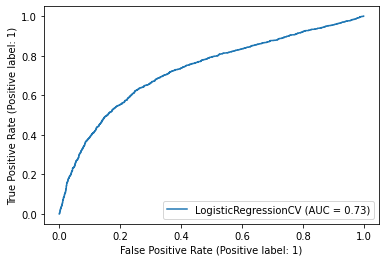

In [30]:
#| echo: false
print(f'Model accuracy: {results.score(X_test, y_test):.3}')
print(f'Model accuracy: {results.score(X_train, y_train):.3}')

RocCurveDisplay.from_estimator(results, X_test, y_test)
plt.show()

## KNN
### Basic

In [106]:
# create KNN model
knn = KNeighborsClassifier()

knn_result = knn.fit(X_train, y_train)

Model accuracy: 0.686
Model accuracy: 0.776


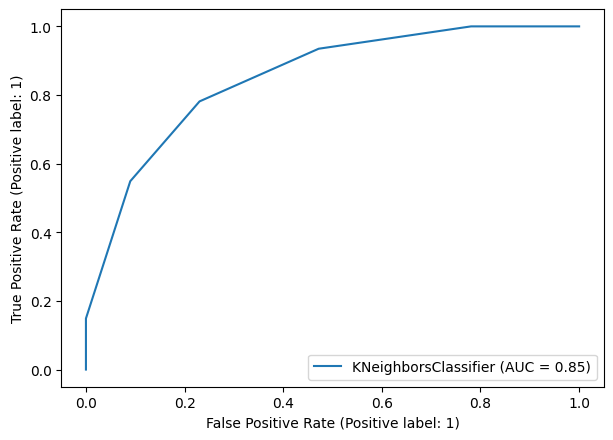

In [107]:
#| echo: false
print(f'Model accuracy: {knn_result.score(X_test, y_test):.3}')
print(f'Model accuracy: {knn_result.score(X_train, y_train):.3}')

RocCurveDisplay.from_estimator(knn_result, X_train, y_train)
plt.show()

### Tuning

In [108]:
# create repeated 10-Fold
kfold = RepeatedKFold(n_splits=5, n_repeats=10)

param_grid = {"n_neighbors": range(1, 50, 4)}

knn_search = GridSearchCV(
    knn, param_grid, cv=kfold, scoring="roc_auc", n_jobs=-1
)
result = knn_search.fit(X_train, y_train)

Model accuracy: 0.778
Model accuracy: 0.837


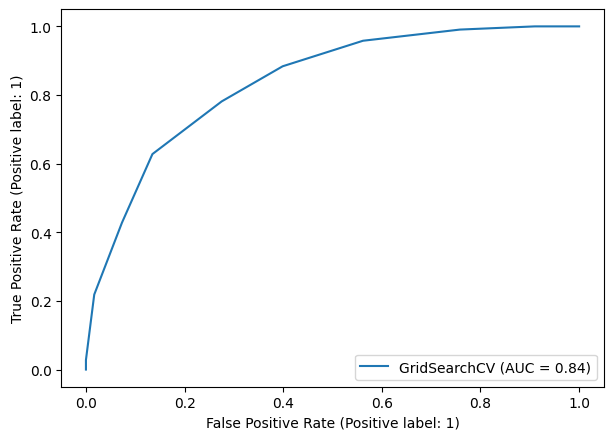

In [109]:
#| echo: false
print(f'Model accuracy: {result.score(X_test, y_test):.3}')
print(f'Model accuracy: {result.score(X_train, y_train):.3}')

RocCurveDisplay.from_estimator(result, X_train, y_train)
plt.show()